In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 3.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=168f0d29fa43fff25c6dbcd92a4a01d9076538df357e2edd869a45f4f063c71d
  Stored in directory: /home/u187934/.cache/pip/wheels/9c/45/15/6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [6]:
#Configure kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#Download the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100%|███████████████████████████████████████▉| 163M/163M [00:41<00:00, 3.76MB/s]
100%|████████████████████████████████████████| 163M/163M [00:41<00:00, 4.08MB/s]


In [12]:
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The datset is extracted')

The datset is extracted


In [2]:
!ls

data  Detection.ipynb  face-mask-dataset.zip  kaggle.json


```Import Dependencies```

In [50]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

Importing the Dataset

In [2]:
with_mask_files = os.listdir('data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3643.jpg', 'with_mask_1550.jpg', 'with_mask_483.jpg', 'with_mask_1837.jpg', 'with_mask_2716.jpg']
['with_mask_2388.jpg', 'with_mask_2678.jpg', 'with_mask_781.jpg', 'with_mask_3546.jpg', 'with_mask_1197.jpg']


In [3]:
without_mask_files = os.listdir('data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2595.jpg', 'without_mask_143.jpg', 'without_mask_3805.jpg', 'without_mask_532.jpg', 'without_mask_3771.jpg']
['without_mask_97.jpg', 'without_mask_1401.jpg', 'without_mask_2133.jpg', 'without_mask_2486.jpg', 'without_mask_251.jpg']


In [4]:
print('Number of with mask images: ', len(with_mask_files))
print('Number of without mask images: ', len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


`Create Labels`

In [5]:
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)

In [6]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


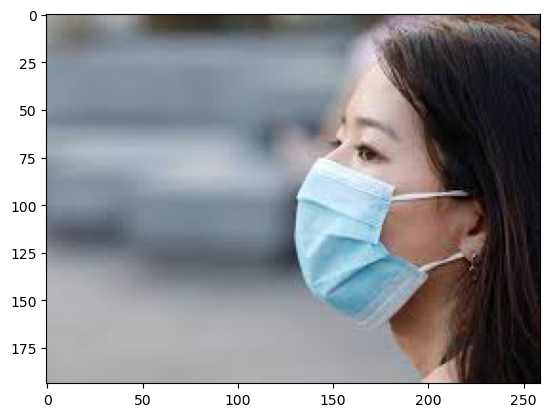

In [7]:
#Displaying with mask image

img1 = mpimg.imread('data/with_mask/with_mask_2500.jpg')
imgplot = plt.imshow(img1)
plt.show()

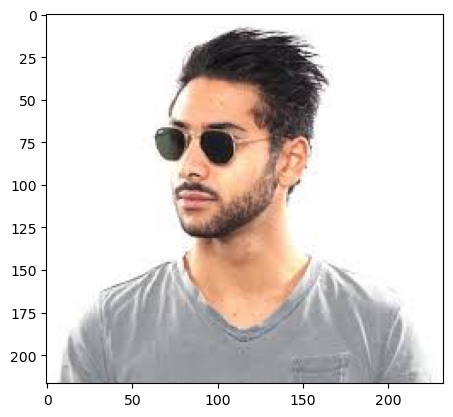

In [8]:
#Displaying without mask image

img2 = mpimg.imread('data/without_mask/without_mask_2500.jpg')
imgplot = plt.imshow(img2)
plt.show()

```Image Processing```
1. Resizing the images and Converting it to numpy array

In [9]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [11]:
type(data)

list

In [12]:
data[0]

array([[[207, 232, 252],
        [206, 231, 251],
        [206, 231, 251],
        ...,
        [101, 113,  76],
        [ 36,  48,  12],
        [ 37,  49,  13]],

       [[207, 232, 252],
        [207, 232, 252],
        [207, 232, 252],
        ...,
        [ 97, 108,  69],
        [ 39,  50,  12],
        [ 56,  68,  31]],

       [[207, 232, 252],
        [208, 233, 253],
        [208, 233, 253],
        ...,
        [ 93, 104,  63],
        [ 52,  63,  23],
        [ 68,  80,  40]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
X = np.array(data)
y = np.array(labels)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
X_train.shape

(6042, 128, 128, 3)

In [17]:
X_test.shape

(1511, 128, 128, 3)

In [18]:
#Scale the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
X_train_scaled[0]

array([[[0.03921569, 0.12156863, 0.18823529],
        [0.03137255, 0.11372549, 0.16470588],
        [0.03137255, 0.10196078, 0.12941176],
        ...,
        [0.31372549, 0.41176471, 0.48627451],
        [0.33333333, 0.44313725, 0.53333333],
        [0.36470588, 0.48235294, 0.58431373]],

       [[0.02352941, 0.09803922, 0.16470588],
        [0.02745098, 0.10196078, 0.15686275],
        [0.03137255, 0.09803922, 0.12941176],
        ...,
        [0.2745098 , 0.36470588, 0.44313725],
        [0.30196078, 0.40784314, 0.50196078],
        [0.3372549 , 0.45490196, 0.55686275]],

       [[0.00784314, 0.0745098 , 0.1372549 ],
        [0.01960784, 0.09019608, 0.14117647],
        [0.03529412, 0.09803922, 0.12941176],
        ...,
        [0.23529412, 0.3254902 , 0.40392157],
        [0.27843137, 0.37647059, 0.47058824],
        [0.32941176, 0.43529412, 0.5372549 ]],

       ...,

       [[0.14509804, 0.26666667, 0.38823529],
        [0.14509804, 0.26666667, 0.38823529],
        [0.14509804, 0

``Build a CNN Model``

In [20]:
import tensorflow as tf
from tensorflow import keras

2023-03-11 10:25:54.241342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))

2023-03-11 10:26:30.582937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 10:26:30.584408: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [22]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [27]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 [==============================] - 27s 158ms/step - loss: 0.1091 - acc: 0.9632 - val_loss: 0.2067 - val_acc: 0.9256
Epoch 2/20
170/170 [==============================] - 27s 161ms/step - loss: 0.1011 - acc: 0.9627 - val_loss: 0.1970 - val_acc: 0.9322
Epoch 3/20
170/170 [==============================] - 27s 160ms/step - loss: 0.0864 - acc: 0.9704 - val_loss: 0.1925 - val_acc: 0.9488
Epoch 4/20
170/170 [==============================] - 27s 157ms/step - loss: 0.0811 - acc: 0.9726 - val_loss: 0.2185 - val_acc: 0.9339
Epoch 5/20
170/170 [==============================] - 28s 164ms/step - loss: 0.0708 - acc: 0.9765 - val_loss: 0.2500 - val_acc: 0.9405
Epoch 6/20
170/170 [==============================] - 28s 162ms/step - loss: 0.0645 - acc: 0.9763 - val_loss: 0.2411 - val_acc: 0.9388
Epoch 7/20
170/170 [==============================] - 27s 158ms/step - loss: 0.0516 - acc: 0.9803 - val_loss: 0.2494 - val_acc: 0.9471
Epoch 8/20
170/170 [==============================] - 2

In [28]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 2s 39ms/step - loss: 0.2427 - acc: 0.9484
Test Accuracy = 0.9483785629272461


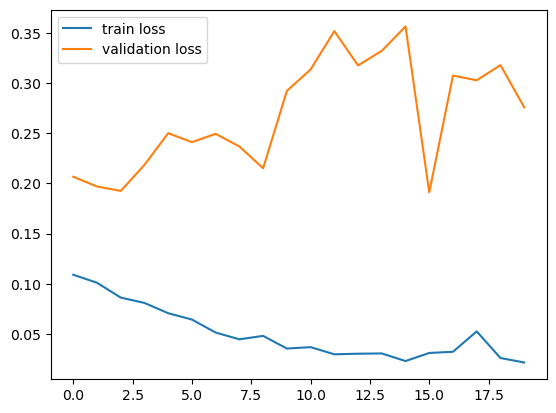

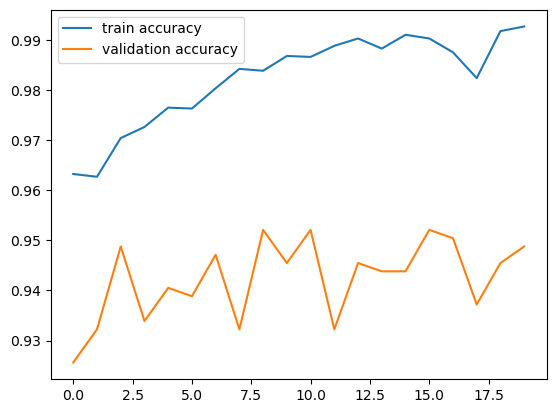

In [29]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [30]:
haar_data = cv2.CascadeClassifier('data.xml')

In [31]:
capture = cv2.VideoCapture('mask.mp4')

In [32]:
font = cv2.FONT_HERSHEY_DUPLEX

In [48]:
prediction = model.predict(X_test)

48/48 [==============================] - 2s 35ms/step


In [51]:
pred_label=[]
for row in prediction:
    N=np.argmax(row)
    if N==1:
        pred_label.append('with mask')
    else:
        pred_label.append('without mask')
pd.DataFrame(pred_label,columns=['Prediction'])

,Prediction
0,with mask
1,with mask
2,with mask
3,with mask
4,without mask
...,...
1506,with mask
1507,with mask
1508,with mask
1509,without mask


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

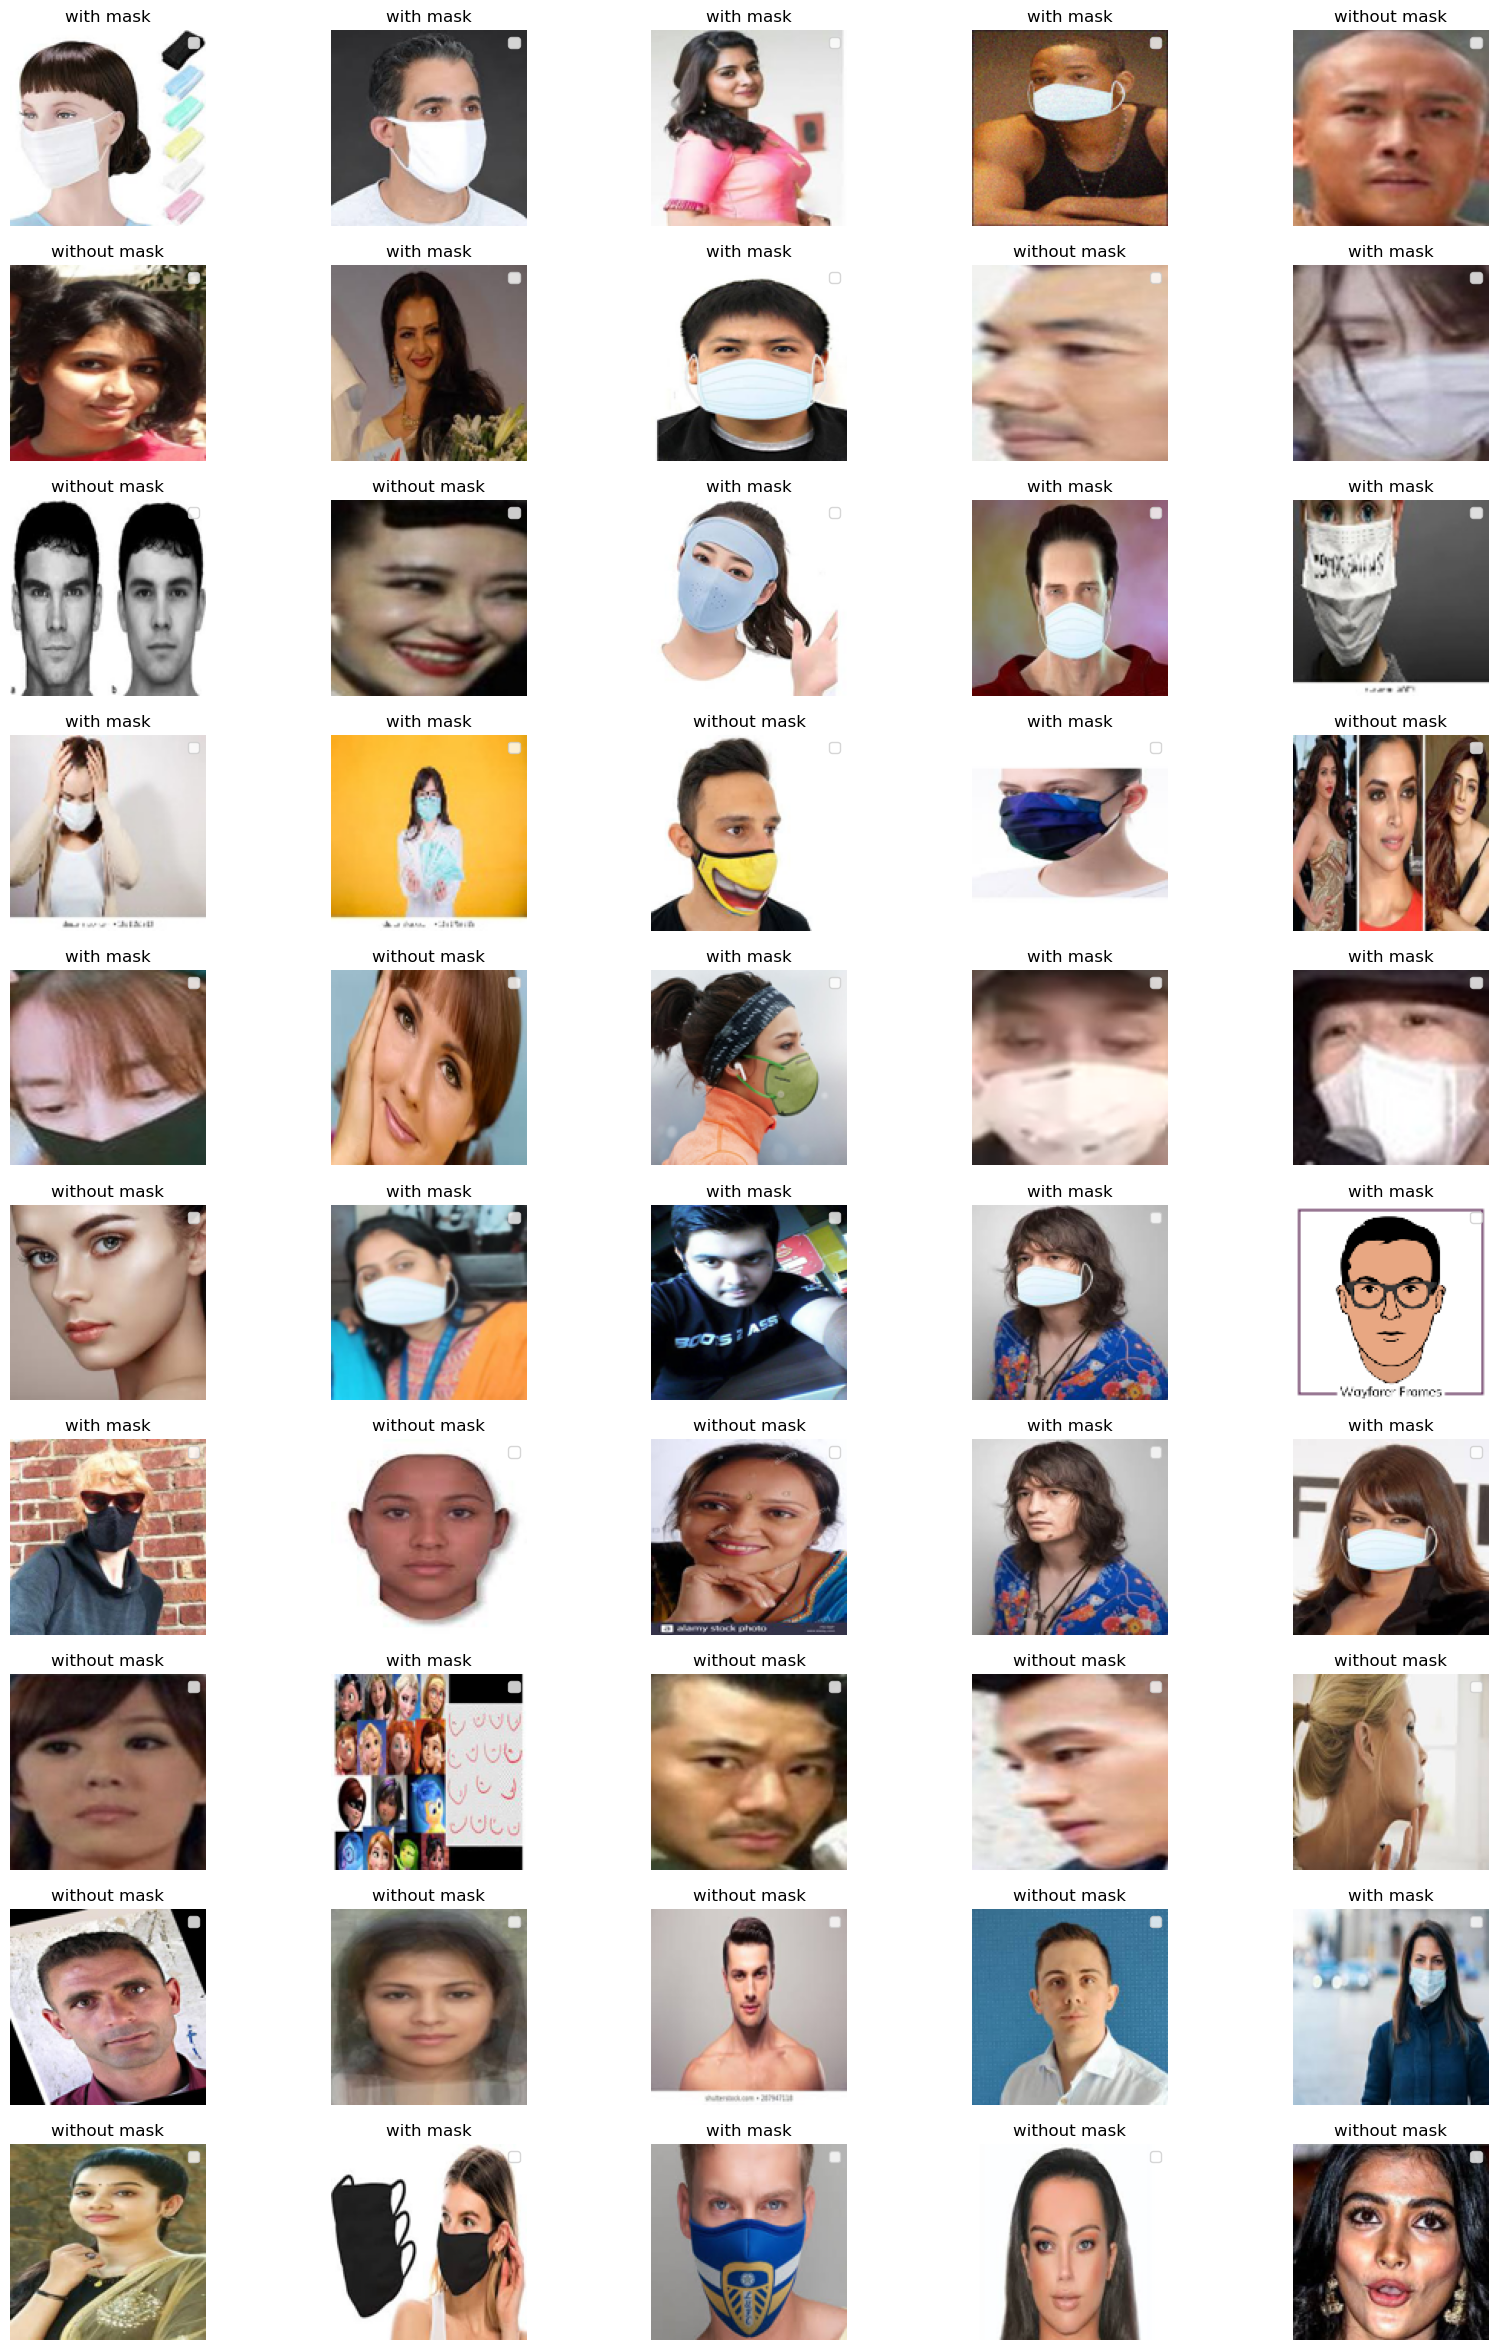

In [52]:
plt.figure(figsize=(20,30))
i=1
for img in X_test:
    if i==51:
        break
    plt.subplot(10,5,i)
    plt.imshow(img)
    plt.title(pred_label[i-1])
    plt.legend()
    i+=1
    plt.axis('off')

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [65]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.87      0.92       770
           1       0.88      0.98      0.93       741

    accuracy                           0.92      1511
   macro avg       0.93      0.92      0.92      1511
weighted avg       0.93      0.92      0.92      1511



In [62]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.3 MB/s eta 0:00:0000:0100:01


array([[670, 100],
       [ 15, 726]])

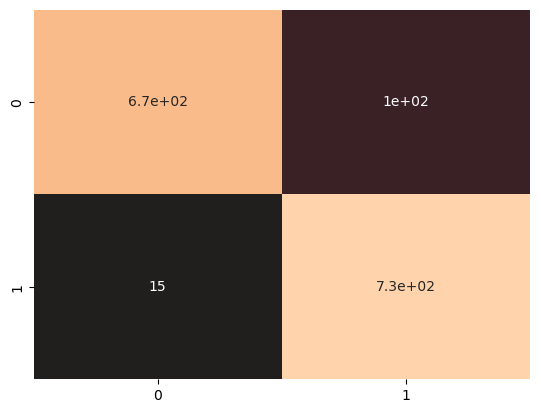

In [66]:
y_pred=[1 if m=='with mask' else 0 for m in pred_label]
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, center = True,annot=True,cbar=False)
CM

In [68]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : "\n"', ClassificationReport )

Classification Report is : "
"               precision    recall  f1-score   support

           0       0.98      0.87      0.92       770
           1       0.88      0.98      0.93       741

    accuracy                           0.92      1511
   macro avg       0.93      0.92      0.92      1511
weighted avg       0.93      0.92      0.92      1511

